In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [2]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Sprint Qualifying*

In [3]:
SpQuali = f1.get_session(2025, "Miami", "Sprint Qualifying")
SpQuali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (667.92 MB) /home/hexa/.cache/fastf1
core           INFO 	Loading data for Miami Grand Prix - Sprint Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['12', '81', '4', '1', '

In [4]:
SpQuali.session_info

{'Meeting': {'Key': 1259,
  'Name': 'Miami Grand Prix',
  'OfficialName': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025',
  'Location': 'Miami',
  'Number': 6,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 151, 'ShortName': 'Miami'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10024,
 'Type': 'Qualifying',
 'Name': 'Sprint Qualifying',
 'StartDate': datetime.datetime(2025, 5, 2, 16, 30),
 'EndDate': datetime.datetime(2025, 5, 2, 17, 14),
 'GmtOffset': datetime.timedelta(days=-1, seconds=72000),
 'Path': '2025/2025-05-04_Miami_Grand_Prix/2025-05-02_Sprint_Qualifying/'}

In [5]:
SpQuali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
12,ANT,Mercedes,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
4,NOR,McLaren,NaN,3.0,NaT,
1,VER,Red Bull Racing,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
16,LEC,Ferrari,NaN,6.0,NaT,
44,HAM,Ferrari,NaN,7.0,NaT,
23,ALB,Williams,NaN,8.0,NaT,
6,HAD,Racing Bulls,NaN,9.0,NaT,
14,ALO,Aston Martin,NaN,10.0,NaT,


In [6]:
SpQuali_laps = SpQuali.laps
SpQuali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:27.977000,PIA,81,NaT,1.0,1.0,0 days 00:16:35.857000,NaT,NaT,0 days 00:00:41.561000,...,True,McLaren,0 days 00:16:35.857000,2025-05-02 20:32:57.758,1,NaN,False,,False,False
1,0 days 00:19:56.133000,PIA,81,0 days 00:01:28.156000,2.0,1.0,NaT,NaT,0 days 00:00:29.435000,0 days 00:00:33.687000,...,True,McLaren,0 days 00:18:27.977000,2025-05-02 20:34:49.878,1,NaN,False,,False,True
2,0 days 00:21:55.279000,PIA,81,0 days 00:01:59.146000,3.0,1.0,NaT,NaT,0 days 00:00:44.315000,0 days 00:00:42.088000,...,True,McLaren,0 days 00:19:56.133000,2025-05-02 20:36:18.034,1,NaN,False,,False,True
3,0 days 00:23:57.205000,PIA,81,0 days 00:02:01.926000,4.0,1.0,NaT,NaT,0 days 00:00:48.279000,0 days 00:00:42.997000,...,True,McLaren,0 days 00:21:55.279000,2025-05-02 20:38:17.180,1,NaN,False,,False,True
4,0 days 00:25:25.156000,PIA,81,0 days 00:01:27.951000,5.0,1.0,NaT,NaT,0 days 00:00:29.400000,0 days 00:00:33.610000,...,True,McLaren,0 days 00:23:57.205000,2025-05-02 20:40:19.106,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0 days 00:18:32.181000,STR,18,0 days 00:01:29.028000,2.0,1.0,NaT,NaT,0 days 00:00:29.750000,0 days 00:00:34.146000,...,True,Aston Martin,0 days 00:17:03.153000,2025-05-02 20:33:25.054,1,NaN,False,,False,True
209,0 days 00:20:38.083000,STR,18,0 days 00:02:05.902000,3.0,1.0,NaT,0 days 00:20:32.720000,0 days 00:00:42.765000,0 days 00:00:46.269000,...,True,Aston Martin,0 days 00:18:32.181000,2025-05-02 20:34:54.082,1,NaN,False,,False,False
210,0 days 00:24:05.176000,STR,18,NaT,4.0,2.0,0 days 00:22:11.766000,NaT,NaT,0 days 00:00:42.910000,...,False,Aston Martin,0 days 00:20:38.083000,2025-05-02 20:36:59.984,1,NaN,False,,False,False
211,0 days 00:25:34.229000,STR,18,0 days 00:01:29.053000,5.0,2.0,NaT,NaT,0 days 00:00:29.719000,0 days 00:00:33.964000,...,False,Aston Martin,0 days 00:24:05.176000,2025-05-02 20:40:27.077,1,NaN,False,,False,True


In [7]:
ant_SpQuali_laps = SpQuali.laps.pick_driver("ANT")
fastest_lap_ant_SpQuali = ant_SpQuali_laps.pick_fastest().LapTime
ant_SpQuali_lap_time = ant_SpQuali_laps["LapTime"]
ant_SpQuali_sec1 = ant_SpQuali_laps["Sector1Time"]
ant_SpQuali_sec2 = ant_SpQuali_laps["Sector2Time"]
ant_SpQuali_sec3 = ant_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ant_SpQuali), "which was in Lap number" ,ant_SpQuali_laps.pick_fastest().LapNumber)
ant_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.482000 which was in Lap number 14.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
99,NaT,NaT,0 days 00:00:40.711000,0 days 00:00:27.443000,156.0,144.0,286.0,279.0
100,0 days 00:01:27.858000,0 days 00:00:29.393000,0 days 00:00:33.542000,0 days 00:00:24.923000,219.0,192.0,283.0,339.0
101,0 days 00:02:00.652000,0 days 00:00:38.774000,0 days 00:00:42.123000,0 days 00:00:39.755000,166.0,143.0,71.0,200.0
102,0 days 00:02:06.587000,0 days 00:00:51.127000,0 days 00:00:43.170000,0 days 00:00:32.290000,172.0,125.0,284.0,225.0
103,0 days 00:01:28.429000,0 days 00:00:29.394000,0 days 00:00:33.846000,0 days 00:00:25.189000,219.0,191.0,285.0,341.0


In [8]:
fastest_lap_ant_SpQuali = ant_SpQuali_laps.pick_fastest()
tele_ant_SpQuali = fastest_lap_ant_SpQuali.get_telemetry().add_distance()
speed_ant_SpQuali = tele_ant_SpQuali.Speed
tele_ant_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,294.914284,8,10530.364261
3,296.700001,8,10554.025012
4,297.000000,8,10558.000000
5,298.714286,8,10638.571429
6,300.000000,8,10699.000000
...,...,...,...
633,285.000000,7,11760.000000
634,288.000000,7,11813.000000
635,289.500000,7,11885.500000
636,291.000000,7,11958.000000


In [9]:
pia_SpQuali_laps = SpQuali.laps.pick_driver("PIA")
fastest_lap_pia_SpQuali = pia_SpQuali_laps.pick_fastest().LapTime
pia_SpQuali_lap_time = pia_SpQuali_laps["LapTime"]
pia_SpQuali_sec1 = pia_SpQuali_laps["Sector1Time"]
pia_SpQuali_sec2 = pia_SpQuali_laps["Sector2Time"]
pia_SpQuali_sec3 = pia_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_SpQuali), "which was in Lap number" ,pia_SpQuali_laps.pick_fastest().LapNumber)
pia_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.527000 which was in Lap number 11.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:41.561000,0 days 00:00:31.211000,109.0,121.0,287.0,155.0
1,0 days 00:01:28.156000,0 days 00:00:29.435000,0 days 00:00:33.687000,0 days 00:00:25.034000,219.0,190.0,284.0,337.0
2,0 days 00:01:59.146000,0 days 00:00:44.315000,0 days 00:00:42.088000,0 days 00:00:32.743000,142.0,138.0,148.0,259.0
3,0 days 00:02:01.926000,0 days 00:00:48.279000,0 days 00:00:42.997000,0 days 00:00:30.650000,164.0,129.0,283.0,230.0
4,0 days 00:01:27.951000,0 days 00:00:29.400000,0 days 00:00:33.610000,0 days 00:00:24.941000,223.0,191.0,288.0,338.0


In [10]:
fastest_lap_pia_SpQuali = pia_SpQuali_laps.pick_fastest()
tele_pia_SpQuali = fastest_lap_pia_SpQuali.get_telemetry().add_distance()
speed_pia_SpQuali = tele_pia_SpQuali.Speed
tele_pia_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,295.060715,7,11082.299917
3,299.785714,7,10509.000000
4,300.000000,8,10483.000000
5,302.888889,8,10622.388889
6,304.000000,8,10676.000000
...,...,...,...
639,285.000000,7,11434.000000
640,287.780001,7,11557.015057
641,289.000000,7,11611.000000
642,292.000000,7,11726.000000


In [11]:
ver_SpQuali_laps = SpQuali.laps.pick_driver("VER")
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest().LapTime
ver_SpQuali_lap_time = ver_SpQuali_laps["LapTime"]
ver_SpQuali_sec1 = ver_SpQuali_laps["Sector1Time"]
ver_SpQuali_sec2 = ver_SpQuali_laps["Sector2Time"]
ver_SpQuali_sec3 = ver_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_SpQuali), "which was in Lap number" ,ver_SpQuali_laps.pick_fastest().LapNumber)
ver_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.737000 which was in Lap number 15.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
28,NaT,NaT,0 days 00:00:46.879000,0 days 00:00:30.215000,145.0,91.0,283.0,262.0
29,0 days 00:01:27.953000,0 days 00:00:29.191000,0 days 00:00:33.569000,0 days 00:00:25.193000,219.0,190.0,283.0,340.0
30,0 days 00:02:03.868000,0 days 00:00:42.632000,0 days 00:00:47.765000,0 days 00:00:33.471000,159.0,154.0,NaN,278.0
31,NaT,NaT,0 days 00:00:42.477000,0 days 00:00:38.450000,208.0,149.0,NaN,109.0
32,NaT,NaT,0 days 00:00:38.366000,0 days 00:00:28.835000,195.0,162.0,285.0,281.0


In [12]:
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest()
tele_ver_SpQuali = fastest_lap_ver_SpQuali.get_telemetry().add_distance()
speed_ver_SpQuali = tele_ver_SpQuali.Speed
tele_ver_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,292.012499,7,11599.343728
3,292.237501,7,11605.531272
4,294.000000,7,11654.000000
5,296.000000,7,11137.000000
6,296.400000,7,10931.800000
...,...,...,...
641,282.000000,7,11225.000000
642,282.553126,7,11254.315657
643,285.000000,7,11384.000000
644,285.000000,7,11418.363636


In [13]:
ham_SpQuali_laps = SpQuali.laps.pick_driver("HAM")
fastest_lap_ham_SpQuali = ham_SpQuali_laps.pick_fastest().LapTime
ham_SpQuali_lap_time = ham_SpQuali_laps["LapTime"]
ham_SpQuali_sec1 = ham_SpQuali_laps["Sector1Time"]
ham_SpQuali_sec2 = ham_SpQuali_laps["Sector2Time"]
ham_SpQuali_sec3 = ham_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_SpQuali), "which was in Lap number" ,ham_SpQuali_laps.pick_fastest().LapNumber)
ham_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:27.030000 which was in Lap number 14.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
149,NaT,NaT,0 days 00:00:39.999000,0 days 00:00:32.541000,184.0,152.0,284.0,127.0
150,0 days 00:01:28.231000,0 days 00:00:29.309000,0 days 00:00:33.816000,0 days 00:00:25.106000,220.0,189.0,285.0,338.0
151,0 days 00:02:02.067000,0 days 00:00:51.183000,0 days 00:00:38.492000,0 days 00:00:32.392000,179.0,173.0,127.0,242.0
152,0 days 00:02:02.465000,0 days 00:00:50.362000,0 days 00:00:42.934000,0 days 00:00:29.169000,149.0,142.0,283.0,252.0
153,0 days 00:01:28.371000,0 days 00:00:29.334000,0 days 00:00:33.904000,0 days 00:00:25.133000,219.0,191.0,285.0,337.0


In [14]:
fastest_lap_ham_SpQuali = ham_SpQuali_laps.pick_fastest()
tele_ham_SpQuali = fastest_lap_ham_SpQuali.get_telemetry().add_distance()
speed_ham_SpQuali = tele_ham_SpQuali.Speed
tele_ham_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,292.359092,7,10508.908666
3,292.454545,7,10462.454545
4,293.000000,7,10197.000000
5,293.802005,7,10350.984938
6,294.699248,7,10523.255648
...,...,...,...
644,284.839287,7,11501.425037
645,287.000000,7,11571.000000
646,290.000000,7,11664.000000
647,290.125000,7,11660.187500


In [15]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_SpQuali_sec1),
        "Sector1Time": ant_SpQuali_sec1,
        "Sector2Time": ant_SpQuali_sec2,
        "Sector3Time": ant_SpQuali_sec3,
        "Lap Time": ant_SpQuali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_SpQuali_sec1),
        "Sector1Time": pia_SpQuali_sec1,
        "Sector2Time": pia_SpQuali_sec2,
        "Sector3Time": pia_SpQuali_sec3,
        "Lap Time": pia_SpQuali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_SpQuali_sec1),
        "Sector1Time": ver_SpQuali_sec1,
        "Sector2Time": ver_SpQuali_sec2,
        "Sector3Time": ver_SpQuali_sec3,
        "Lap Time": ver_SpQuali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_SpQuali_sec1),
        "Sector1Time": ham_SpQuali_sec1,
        "Sector2Time": ham_SpQuali_sec2,
        "Sector3Time": ham_SpQuali_sec3,
        "Lap Time": ham_SpQuali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Andrea Kimi Antonelli,0 days 00:00:29.393000,0 days 00:00:33.542000,0 days 00:00:24.923000,0 days 00:01:27.858000
2,Andrea Kimi Antonelli,0 days 00:00:38.774000,0 days 00:00:42.123000,0 days 00:00:39.755000,0 days 00:02:00.652000
3,Andrea Kimi Antonelli,0 days 00:00:51.127000,0 days 00:00:43.170000,0 days 00:00:32.290000,0 days 00:02:06.587000
4,Andrea Kimi Antonelli,0 days 00:00:29.394000,0 days 00:00:33.846000,0 days 00:00:25.189000,0 days 00:01:28.429000
5,Andrea Kimi Antonelli,0 days 00:00:43.017000,0 days 00:00:43.747000,0 days 00:00:40.392000,0 days 00:02:07.156000
7,Andrea Kimi Antonelli,0 days 00:00:29.190000,0 days 00:00:33.570000,0 days 00:00:24.967000,0 days 00:01:27.727000
10,Andrea Kimi Antonelli,0 days 00:00:29.056000,0 days 00:00:33.309000,0 days 00:00:25.019000,0 days 00:01:27.384000
11,Andrea Kimi Antonelli,0 days 00:00:39.371000,0 days 00:00:41.859000,0 days 00:00:36.593000,0 days 00:01:57.823000
13,Andrea Kimi Antonelli,0 days 00:00:28.668000,0 days 00:00:32.978000,0 days 00:00:24.836000,0 days 00:01:26.482000
14,Andrea Kimi Antonelli,0 days 00:00:39.257000,0 days 00:00:44.456000,0 days 00:00:50.878000,0 days 00:02:14.591000


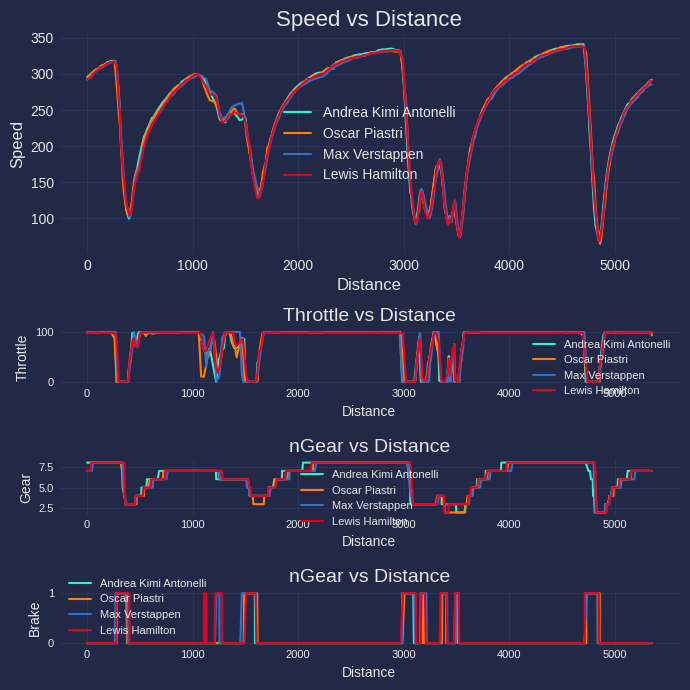

In [16]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = SpQuali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ant_SpQuali.Distance, tele_ant_SpQuali.Speed, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[0].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ant_SpQuali.Distance, tele_ant_SpQuali.Throttle, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[1].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ant_SpQuali.Distance, tele_ant_SpQuali.nGear, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[2].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.nGear, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ant_SpQuali.Distance, tele_ant_SpQuali.Brake, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[3].plot(
    tele_pia_SpQuali.Distance, tele_pia_SpQuali.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_ham_SpQuali.Distance, tele_ham_SpQuali.Brake, label="Lewis Hamilton", color=get_driver_color("HAM")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [17]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_SpQuali_sec1),
        "Sector1Time": ant_SpQuali_sec1,
        "Sector2Time": ant_SpQuali_sec2,
        "Sector3Time": ant_SpQuali_sec3,
        "Lap Time": ant_SpQuali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_SpQuali_sec1),
        "Sector1Time": pia_SpQuali_sec1,
        "Sector2Time": pia_SpQuali_sec2,
        "Sector3Time": pia_SpQuali_sec3,
        "Lap Time": pia_SpQuali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_SpQuali_sec1),
        "Sector1Time": ver_SpQuali_sec1,
        "Sector2Time": ver_SpQuali_sec2,
        "Sector3Time": ver_SpQuali_sec3,
        "Lap Time": ver_SpQuali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_SpQuali_sec1),
        "Sector1Time": ham_SpQuali_sec1,
        "Sector2Time": ham_SpQuali_sec2,
        "Sector3Time": ham_SpQuali_sec3,
        "Lap Time": ham_SpQuali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Andrea Kimi Antonelli,0 days 00:00:29.393000,0 days 00:00:33.542000,0 days 00:00:24.923000,0 days 00:01:27.858000
2,Andrea Kimi Antonelli,0 days 00:00:38.774000,0 days 00:00:42.123000,0 days 00:00:39.755000,0 days 00:02:00.652000
3,Andrea Kimi Antonelli,0 days 00:00:51.127000,0 days 00:00:43.170000,0 days 00:00:32.290000,0 days 00:02:06.587000
4,Andrea Kimi Antonelli,0 days 00:00:29.394000,0 days 00:00:33.846000,0 days 00:00:25.189000,0 days 00:01:28.429000
5,Andrea Kimi Antonelli,0 days 00:00:43.017000,0 days 00:00:43.747000,0 days 00:00:40.392000,0 days 00:02:07.156000
7,Andrea Kimi Antonelli,0 days 00:00:29.190000,0 days 00:00:33.570000,0 days 00:00:24.967000,0 days 00:01:27.727000
10,Andrea Kimi Antonelli,0 days 00:00:29.056000,0 days 00:00:33.309000,0 days 00:00:25.019000,0 days 00:01:27.384000
11,Andrea Kimi Antonelli,0 days 00:00:39.371000,0 days 00:00:41.859000,0 days 00:00:36.593000,0 days 00:01:57.823000
13,Andrea Kimi Antonelli,0 days 00:00:28.668000,0 days 00:00:32.978000,0 days 00:00:24.836000,0 days 00:01:26.482000
14,Andrea Kimi Antonelli,0 days 00:00:39.257000,0 days 00:00:44.456000,0 days 00:00:50.878000,0 days 00:02:14.591000


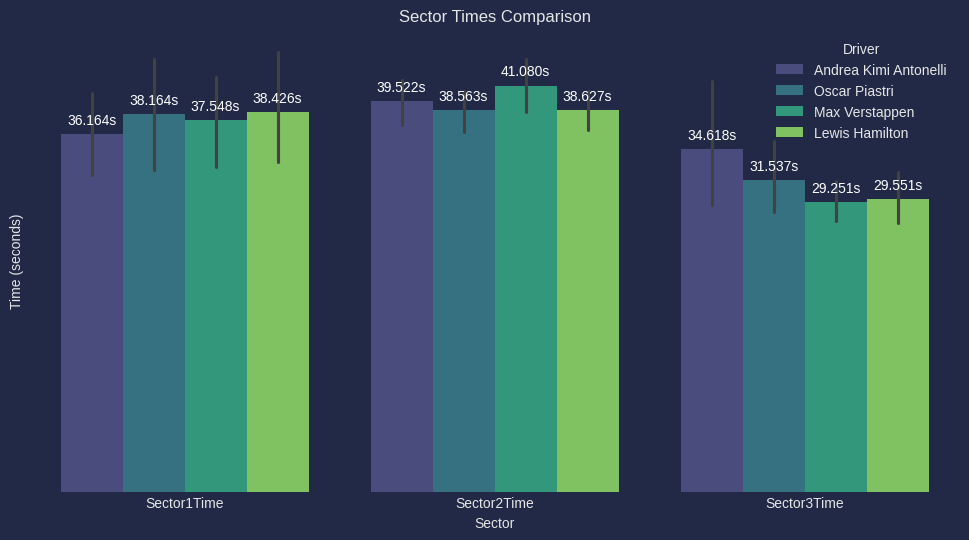

In [18]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Sprint Race*

In [19]:
sprint = f1.get_session(2025, "Miami", "Sprint")
sprint.load()

core           INFO 	Loading data for Miami Grand Prix - Sprint [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 16
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 16)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.023000 before the recorde

In [20]:
sprint.session_info

{'Meeting': {'Key': 1259,
  'Name': 'Miami Grand Prix',
  'OfficialName': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025',
  'Location': 'Miami',
  'Number': 6,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 151, 'ShortName': 'Miami'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10028,
 'Type': 'Race',
 'Name': 'Sprint',
 'StartDate': datetime.datetime(2025, 5, 3, 12, 0),
 'EndDate': datetime.datetime(2025, 5, 3, 13, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=72000),
 'Path': '2025/2025-05-04_Miami_Grand_Prix/2025-05-03_Sprint/'}

In [21]:
sprint.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,3.0,1.0,0 days 00:36:37.647000,Finished
81,PIA,McLaren,2.0,2.0,0 days 00:00:00.672000,Finished
44,HAM,Ferrari,7.0,3.0,0 days 00:00:01.073000,Finished
63,RUS,Mercedes,5.0,4.0,0 days 00:00:03.127000,Finished
18,STR,Aston Martin,16.0,5.0,0 days 00:00:03.412000,Finished
22,TSU,Red Bull Racing,20.0,6.0,0 days 00:00:05.153000,Finished
12,ANT,Mercedes,1.0,7.0,0 days 00:00:05.635000,Finished
10,GAS,Alpine,13.0,8.0,0 days 00:00:05.973000,Finished
27,HUL,Kick Sauber,11.0,9.0,0 days 00:00:06.153000,Finished
6,HAD,Racing Bulls,9.0,10.0,0 days 00:00:07.502000,Finished


In [22]:
sprint_laps = sprint.laps
sprint_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:11.681000,NOR,4,NaT,1.0,2.0,0 days 01:10:57.759000,NaT,NaT,0 days 00:00:52.793000,...,False,McLaren,0 days 01:10:45.523000,2025-05-03 16:28:05.270,1,3.0,False,,False,False
1,0 days 01:16:06.276000,NOR,4,NaT,2.0,2.0,NaT,NaT,0 days 00:00:54.022000,0 days 00:00:54.266000,...,False,McLaren,0 days 01:13:11.681000,2025-05-03 16:30:31.428,1,3.0,False,,False,False
2,0 days 01:18:44.973000,NOR,4,NaT,3.0,2.0,NaT,NaT,0 days 00:01:32.340000,0 days 00:00:38.333000,...,False,McLaren,0 days 01:16:06.276000,2025-05-03 16:33:26.023,1,2.0,False,,False,False
3,0 days 01:20:25.307000,NOR,4,0 days 00:01:40.334000,4.0,2.0,NaT,NaT,0 days 00:00:34.573000,0 days 00:00:38.164000,...,False,McLaren,0 days 01:18:44.973000,2025-05-03 16:36:04.720,1,2.0,False,,False,True
4,0 days 01:22:06.002000,NOR,4,0 days 00:01:40.695000,5.0,2.0,NaT,NaT,0 days 00:00:34.691000,0 days 00:00:38.249000,...,False,McLaren,0 days 01:20:25.307000,2025-05-03 16:37:45.054,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0 days 01:27:28.797000,SAI,55,0 days 00:01:43.165000,8.0,2.0,NaT,NaT,0 days 00:00:35.991000,0 days 00:00:39.083000,...,False,Williams,0 days 01:25:45.632000,2025-05-03 16:43:05.379,1,13.0,False,,False,True
327,0 days 01:29:11.741000,SAI,55,0 days 00:01:42.944000,9.0,2.0,NaT,NaT,0 days 00:00:35.450000,0 days 00:00:39.581000,...,False,Williams,0 days 01:27:28.797000,2025-05-03 16:44:48.544,1,13.0,False,,False,True
328,0 days 01:30:55.666000,SAI,55,0 days 00:01:43.925000,10.0,2.0,NaT,NaT,0 days 00:00:36.502000,0 days 00:00:40.003000,...,False,Williams,0 days 01:29:11.741000,2025-05-03 16:46:31.488,1,12.0,False,,False,True
329,0 days 01:32:44.411000,SAI,55,0 days 00:01:48.745000,11.0,2.0,NaT,0 days 01:32:39.002000,0 days 00:00:36.066000,0 days 00:00:39.670000,...,False,Williams,0 days 01:30:55.666000,2025-05-03 16:48:15.413,1,16.0,False,,False,False


In [23]:
nor_sprint_laps = sprint.laps.pick_driver("NOR")
fastest_lap_nor_sprint = nor_sprint_laps.pick_fastest().LapTime
nor_sprint_lap_time = nor_sprint_laps["LapTime"]
nor_sprint_sec1 = nor_sprint_laps["Sector1Time"]
nor_sprint_sec2 = nor_sprint_laps["Sector2Time"]
nor_sprint_sec3 = nor_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_sprint), "which was in Lap number" ,nor_sprint_laps.pick_fastest().LapNumber)
nor_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:40.334000 which was in Lap number 4.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:52.793000,0 days 00:00:36.165000,128.0,80.0,225.0,221.0
1,NaT,0 days 00:00:54.022000,0 days 00:00:54.266000,0 days 00:01:06.234000,83.0,71.0,30.0,195.0
2,NaT,0 days 00:01:32.340000,0 days 00:00:38.333000,0 days 00:00:28.137000,199.0,170.0,271.0,259.0
3,0 days 00:01:40.334000,0 days 00:00:34.573000,0 days 00:00:38.164000,0 days 00:00:27.597000,206.0,171.0,274.0,300.0
4,0 days 00:01:40.695000,0 days 00:00:34.691000,0 days 00:00:38.249000,0 days 00:00:27.755000,201.0,166.0,275.0,276.0


In [24]:
fastest_lap_nor_sprint = nor_sprint_laps.pick_fastest()
tele_nor_sprint = fastest_lap_nor_sprint.get_telemetry().add_distance()
speed_nor_sprint = tele_nor_sprint.Speed
tele_nor_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,275.687501,7,10988.791680
3,276.000000,7,10994.000000
4,278.056820,7,11052.825062
5,279.875002,7,11104.825062
6,281.000000,7,11137.000000
...,...,...,...
744,274.000000,7,11001.000000
745,276.000000,7,10977.000000
746,276.833333,7,11027.833333
747,278.000000,7,11099.000000


In [25]:
ham_sprint_laps = sprint.laps.pick_driver("HAM")
fastest_lap_ham_sprint = ham_sprint_laps.pick_fastest().LapTime
ham_sprint_lap_time = ham_sprint_laps["LapTime"]
ham_sprint_sec1 = ham_sprint_laps["Sector1Time"]
ham_sprint_sec2 = ham_sprint_laps["Sector2Time"]
ham_sprint_sec3 = ham_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ham_sprint), "which was in Lap number" ,ham_sprint_laps.pick_fastest().LapNumber)
ham_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:36.368000 which was in Lap number 13.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
36,NaT,NaT,0 days 00:00:50.515000,0 days 00:00:36.647000,86.0,107.0,156.0,180.0
37,NaT,0 days 00:00:54.619000,0 days 00:00:56.188000,0 days 00:01:05.845000,70.0,117.0,52.0,164.0
38,NaT,0 days 00:01:27.721000,0 days 00:00:39.165000,0 days 00:00:28.603000,199.0,169.0,273.0,213.0
39,0 days 00:01:41.944000,0 days 00:00:35.381000,0 days 00:00:38.590000,0 days 00:00:27.973000,197.0,167.0,274.0,271.0
40,0 days 00:01:41.804000,0 days 00:00:35.297000,0 days 00:00:38.491000,0 days 00:00:28.016000,194.0,168.0,275.0,261.0


In [26]:
fastest_lap_ham_sprint = ham_sprint_laps.pick_fastest()
tele_ham_sprint = fastest_lap_ham_sprint.get_telemetry().add_distance()
speed_ham_sprint = tele_ham_sprint.Speed
tele_ham_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,289.700000,7,11513.800000
3,290.200000,7,11545.800000
4,291.000000,7,11597.000000
5,293.228571,7,11637.114286
6,295.000000,7,11669.000000
...,...,...,...
704,283.357143,7,11367.871429
705,287.000000,7,11491.000000
706,287.225000,7,11491.000000
707,288.000000,7,11491.000000


In [27]:
rus_sprint_laps = sprint.laps.pick_driver("RUS")
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest().LapTime
rus_sprint_lap_time = rus_sprint_laps["LapTime"]
rus_sprint_sec1 = rus_sprint_laps["Sector1Time"]
rus_sprint_sec2 = rus_sprint_laps["Sector2Time"]
rus_sprint_sec3 = rus_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_sprint), "which was in Lap number" ,rus_sprint_laps.pick_fastest().LapNumber)
rus_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:40.963000 which was in Lap number 6.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
54,NaT,NaT,0 days 00:00:50.637000,0 days 00:00:37.197000,75.0,86.0,154.0,194.0
55,NaT,0 days 00:00:54.116000,0 days 00:00:55.488000,0 days 00:01:05.447000,70.0,103.0,53.0,163.0
56,NaT,0 days 00:01:29.430000,0 days 00:00:39.162000,0 days 00:00:28.290000,206.0,172.0,275.0,206.0
57,0 days 00:01:41.516000,0 days 00:00:35.363000,0 days 00:00:38.258000,0 days 00:00:27.895000,200.0,169.0,274.0,250.0
58,0 days 00:01:41.412000,0 days 00:00:35.237000,0 days 00:00:38.226000,0 days 00:00:27.949000,199.0,169.0,275.0,247.0


In [28]:
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest()
tele_rus_sprint = fastest_lap_rus_sprint.get_telemetry().add_distance()
speed_rus_sprint = tele_rus_sprint.Speed
tele_rus_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,282.100002,7,11469.625029
3,283.000000,7,11482.000000
4,285.545455,7,11580.000000
5,287.000000,7,11636.000000
6,287.245834,7,11645.587510
...,...,...,...
740,271.000000,7,11145.000000
741,275.000000,7,11279.000000
742,275.155171,7,11283.949965
743,276.887932,7,11339.225018


In [29]:
tsu_sprint_laps = sprint.laps.pick_driver("TSU")
fastest_lap_tsu_sprint = tsu_sprint_laps.pick_fastest().LapTime
tsu_sprint_lap_time = tsu_sprint_laps["LapTime"]
tsu_sprint_sec1 = tsu_sprint_laps["Sector1Time"]
tsu_sprint_sec2 = tsu_sprint_laps["Sector2Time"]
tsu_sprint_sec3 = tsu_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_tsu_sprint), "which was in Lap number" ,tsu_sprint_laps.pick_fastest().LapNumber)
tsu_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:38.078000 which was in Lap number 13.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
90,NaT,NaT,0 days 00:00:40.301000,0 days 00:00:35.207000,195.0,160.0,251.0,160.0
91,NaT,0 days 00:00:47.021000,0 days 00:00:56.524000,0 days 00:01:30.763000,109.0,114.0,7.0,143.0
92,0 days 00:01:54.127000,0 days 00:00:44.452000,0 days 00:00:40.653000,0 days 00:00:29.022000,201.0,175.0,271.0,205.0
93,0 days 00:01:45.257000,0 days 00:00:36.960000,0 days 00:00:39.212000,0 days 00:00:29.085000,200.0,172.0,274.0,205.0
94,0 days 00:01:43.079000,0 days 00:00:35.919000,0 days 00:00:38.916000,0 days 00:00:28.244000,202.0,171.0,274.0,238.0


In [30]:
fastest_lap_tsu_sprint = tsu_sprint_laps.pick_fastest()
tele_tsu_sprint = fastest_lap_tsu_sprint.get_telemetry().add_distance()
speed_tsu_sprint = tele_tsu_sprint.Speed
tele_tsu_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,285.654547,7,11234.931881
3,286.145455,7,11261.318182
4,287.972727,7,11359.534060
5,288.000000,7,11361.000000
6,289.962499,7,11452.256213
...,...,...,...
726,288.440000,7,11433.720000
727,290.000000,7,11480.000000
728,290.554999,7,11489.249984
729,293.000000,7,11530.000000


In [31]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_sprint_sec1),
        "Sector1Time": nor_sprint_sec1,
        "Sector2Time": nor_sprint_sec2,
        "Sector3Time": nor_sprint_sec3,
        "Lap Time": nor_sprint_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_sprint_sec1),
        "Sector1Time": ham_sprint_sec1,
        "Sector2Time": ham_sprint_sec2,
        "Sector3Time": ham_sprint_sec3,
        "Lap Time": ham_sprint_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_sprint_sec1),
        "Sector1Time": rus_sprint_sec1,
        "Sector2Time": rus_sprint_sec2,
        "Sector3Time": rus_sprint_sec3,
        "Lap Time": rus_sprint_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Yuki Tsunoda"] * len(tsu_sprint_sec1),
        "Sector1Time": tsu_sprint_sec1,
        "Sector2Time": tsu_sprint_sec2,
        "Sector3Time": tsu_sprint_sec3,
        "Lap Time": tsu_sprint_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
3,Lando Norris,0 days 00:00:34.573000,0 days 00:00:38.164000,0 days 00:00:27.597000,0 days 00:01:40.334000
4,Lando Norris,0 days 00:00:34.691000,0 days 00:00:38.249000,0 days 00:00:27.755000,0 days 00:01:40.695000
5,Lando Norris,0 days 00:00:34.478000,0 days 00:00:38.309000,0 days 00:00:27.755000,0 days 00:01:40.542000
6,Lando Norris,0 days 00:00:34.506000,0 days 00:00:38.291000,0 days 00:00:27.681000,0 days 00:01:40.478000
7,Lando Norris,0 days 00:00:34.609000,0 days 00:00:39.560000,0 days 00:00:27.550000,0 days 00:01:41.719000
8,Lando Norris,0 days 00:00:34.442000,0 days 00:00:38.850000,0 days 00:00:27.677000,0 days 00:01:40.969000
9,Lando Norris,0 days 00:00:34.671000,0 days 00:00:39.112000,0 days 00:00:27.583000,0 days 00:01:41.366000
10,Lando Norris,0 days 00:00:34.724000,0 days 00:00:39.265000,0 days 00:00:27.584000,0 days 00:01:41.573000
11,Lando Norris,0 days 00:00:34.655000,0 days 00:00:39.192000,0 days 00:00:27.287000,0 days 00:01:41.134000
12,Lando Norris,0 days 00:00:35.099000,0 days 00:00:39.793000,0 days 00:00:27.249000,0 days 00:01:42.141000


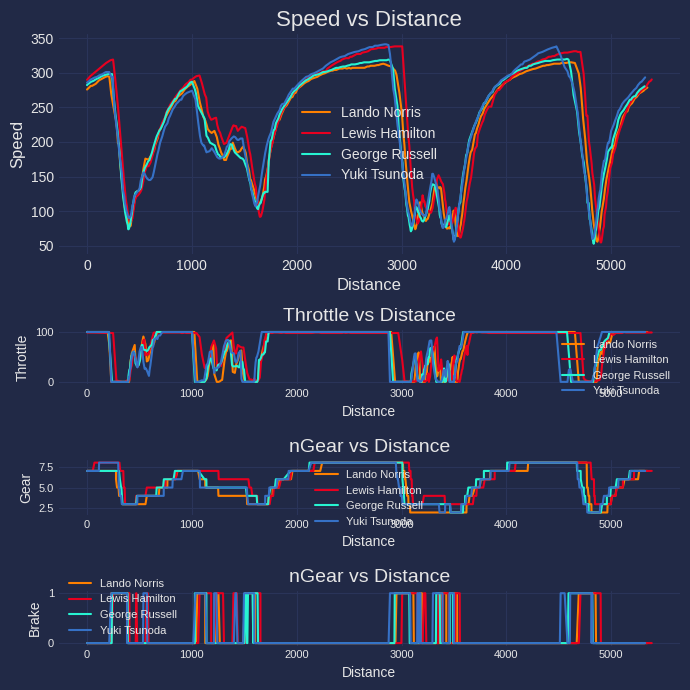

In [32]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = sprint.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_nor_sprint.Distance, tele_nor_sprint.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Speed, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[0].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_tsu_sprint.Distance, tele_tsu_sprint.Speed, label="Yuki Tsunoda", color=get_driver_color("TSU")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_nor_sprint.Distance, tele_nor_sprint.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Throttle, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[1].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_tsu_sprint.Distance, tele_tsu_sprint.Throttle, label="Yuki Tsunoda", color=get_driver_color("TSU")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_nor_sprint.Distance, tele_nor_sprint.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.nGear, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[2].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_tsu_sprint.Distance, tele_tsu_sprint.nGear, label="Yuki Tsunoda", color=get_driver_color("TSU")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_nor_sprint.Distance, tele_nor_sprint.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_ham_sprint.Distance, tele_ham_sprint.Brake, label="Lewis Hamilton", color=get_driver_color("HAM")
)
ax[3].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_tsu_sprint.Distance, tele_tsu_sprint.Brake, label="Yuki Tsunoda", color=get_driver_color("TSU")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [33]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_sprint_sec1),
        "Sector1Time": nor_sprint_sec1,
        "Sector2Time": nor_sprint_sec2,
        "Sector3Time": nor_sprint_sec3,
        "Lap Time": nor_sprint_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lewis Hamilton"] * len(ham_sprint_sec1),
        "Sector1Time": ham_sprint_sec1,
        "Sector2Time": ham_sprint_sec2,
        "Sector3Time": ham_sprint_sec3,
        "Lap Time": ham_sprint_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_sprint_sec1),
        "Sector1Time": rus_sprint_sec1,
        "Sector2Time": rus_sprint_sec2,
        "Sector3Time": rus_sprint_sec3,
        "Lap Time": rus_sprint_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Yuki Tsunoda"] * len(tsu_sprint_sec1),
        "Sector1Time": tsu_sprint_sec1,
        "Sector2Time": tsu_sprint_sec2,
        "Sector3Time": tsu_sprint_sec3,
        "Lap Time": tsu_sprint_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
3,Lando Norris,0 days 00:00:34.573000,0 days 00:00:38.164000,0 days 00:00:27.597000,0 days 00:01:40.334000
4,Lando Norris,0 days 00:00:34.691000,0 days 00:00:38.249000,0 days 00:00:27.755000,0 days 00:01:40.695000
5,Lando Norris,0 days 00:00:34.478000,0 days 00:00:38.309000,0 days 00:00:27.755000,0 days 00:01:40.542000
6,Lando Norris,0 days 00:00:34.506000,0 days 00:00:38.291000,0 days 00:00:27.681000,0 days 00:01:40.478000
7,Lando Norris,0 days 00:00:34.609000,0 days 00:00:39.560000,0 days 00:00:27.550000,0 days 00:01:41.719000
8,Lando Norris,0 days 00:00:34.442000,0 days 00:00:38.850000,0 days 00:00:27.677000,0 days 00:01:40.969000
9,Lando Norris,0 days 00:00:34.671000,0 days 00:00:39.112000,0 days 00:00:27.583000,0 days 00:01:41.366000
10,Lando Norris,0 days 00:00:34.724000,0 days 00:00:39.265000,0 days 00:00:27.584000,0 days 00:01:41.573000
11,Lando Norris,0 days 00:00:34.655000,0 days 00:00:39.192000,0 days 00:00:27.287000,0 days 00:01:41.134000
12,Lando Norris,0 days 00:00:35.099000,0 days 00:00:39.793000,0 days 00:00:27.249000,0 days 00:01:42.141000


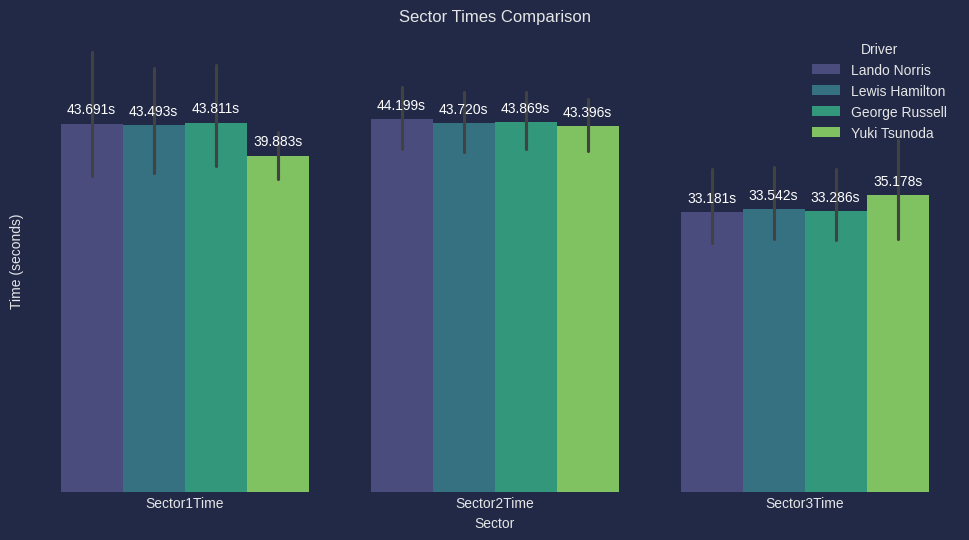

In [34]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Qualifying*

In [35]:
quali = f1.get_session(2025, "Miami", "Qualifying")
quali.load()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x73dbc4e6cdf0>>
Traceback (most recent call last):
  File "/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
req            INFO 	Usin

In [ ]:
quali.session_info

{'Meeting': {'Key': 1259,
  'Name': 'Miami Grand Prix',
  'OfficialName': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025',
  'Location': 'Miami',
  'Number': 6,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 151, 'ShortName': 'Miami'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10029,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 5, 3, 16, 0),
 'EndDate': datetime.datetime(2025, 5, 3, 17, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=72000),
 'Path': '2025/2025-05-04_Miami_Grand_Prix/2025-05-03_Qualifying/'}

In [ ]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,1.0,NaT,
4,NOR,McLaren,NaN,2.0,NaT,
12,ANT,Mercedes,NaN,3.0,NaT,
81,PIA,McLaren,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
55,SAI,Williams,NaN,6.0,NaT,
23,ALB,Williams,NaN,7.0,NaT,
16,LEC,Ferrari,NaN,8.0,NaT,
31,OCO,Haas F1 Team,NaN,9.0,NaT,
22,TSU,Red Bull Racing,NaN,10.0,NaT,


In [ ]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:14.064000,VER,1,NaT,1.0,1.0,0 days 00:15:18.564000,NaT,NaT,0 days 00:00:41.698000,...,False,Red Bull Racing,0 days 00:15:18.564000,2025-05-03 20:16:38.591,1,NaN,False,,False,False
1,0 days 00:18:41.637000,VER,1,0 days 00:01:27.573000,2.0,1.0,NaT,NaT,0 days 00:00:28.784000,0 days 00:00:33.733000,...,False,Red Bull Racing,0 days 00:17:14.064000,2025-05-03 20:18:34.091,1,NaN,False,,False,True
2,0 days 00:20:25.225000,VER,1,0 days 00:01:43.588000,3.0,1.0,NaT,0 days 00:20:18.960000,0 days 00:00:31.813000,0 days 00:00:38.838000,...,False,Red Bull Racing,0 days 00:18:41.637000,2025-05-03 20:20:01.664,1,NaN,False,,False,False
3,0 days 00:24:47.699000,VER,1,NaT,4.0,2.0,0 days 00:22:48.138000,NaT,NaT,0 days 00:00:43.463000,...,True,Red Bull Racing,0 days 00:20:25.225000,2025-05-03 20:21:45.252,1,NaN,False,,False,False
4,0 days 00:26:14.569000,VER,1,0 days 00:01:26.870000,5.0,2.0,NaT,NaT,0 days 00:00:28.413000,0 days 00:00:33.450000,...,True,Red Bull Racing,0 days 00:24:47.699000,2025-05-03 20:26:07.726,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0 days 00:23:58.141000,BEA,87,0 days 00:01:28.611000,5.0,1.0,NaT,NaT,0 days 00:00:29.227000,0 days 00:00:34.166000,...,True,Haas F1 Team,0 days 00:22:29.530000,2025-05-03 20:23:49.557,1,NaN,False,,False,True
310,0 days 00:25:43.358000,BEA,87,0 days 00:01:45.217000,6.0,1.0,NaT,0 days 00:25:38.015000,0 days 00:00:34.949000,0 days 00:00:37.625000,...,True,Haas F1 Team,0 days 00:23:58.141000,2025-05-03 20:25:18.168,1,NaN,False,,False,False
311,0 days 00:29:03.108000,BEA,87,NaT,7.0,2.0,0 days 00:27:16.788000,NaT,NaT,0 days 00:00:40.972000,...,True,Haas F1 Team,0 days 00:25:43.358000,2025-05-03 20:27:03.385,1,NaN,False,,False,False
312,0 days 00:30:31.107000,BEA,87,0 days 00:01:27.999000,8.0,2.0,NaT,NaT,0 days 00:00:29.116000,0 days 00:00:33.765000,...,True,Haas F1 Team,0 days 00:29:03.108000,2025-05-03 20:30:23.135,1,NaN,False,,False,True


In [ ]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.204000 which was in Lap number 17.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:41.698000,0 days 00:00:31.618000,200.0,144.0,286.0,171.0
1,0 days 00:01:27.573000,0 days 00:00:28.784000,0 days 00:00:33.733000,0 days 00:00:25.056000,218.0,190.0,285.0,341.0
2,0 days 00:01:43.588000,0 days 00:00:31.813000,0 days 00:00:38.838000,0 days 00:00:32.937000,199.0,182.0,NaN,267.0
3,NaT,NaT,0 days 00:00:43.463000,0 days 00:00:32.059000,190.0,94.0,288.0,278.0
4,0 days 00:01:26.870000,0 days 00:00:28.413000,0 days 00:00:33.450000,0 days 00:00:25.007000,223.0,191.0,286.0,339.0


In [ ]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,294.316666,7,10859.700557
3,294.608333,7,10707.450278
4,295.000000,8,10503.000000
5,297.924998,8,10512.749995
6,298.000000,8,10513.000000
...,...,...,...
645,282.000000,7,11184.000000
646,282.318749,7,11196.112454
647,285.000000,7,11298.000000
648,285.364284,7,11309.899955


In [ ]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.269000 which was in Lap number 20.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
18,NaT,NaT,0 days 00:00:39.519000,0 days 00:00:32.413000,183.0,134.0,286.0,113.0
19,0 days 00:01:27.672000,0 days 00:00:29.140000,0 days 00:00:33.460000,0 days 00:00:25.072000,217.0,190.0,285.0,335.0
20,0 days 00:01:47.685000,0 days 00:00:35.366000,0 days 00:00:36.829000,0 days 00:00:35.490000,202.0,168.0,NaN,186.0
21,NaT,NaT,0 days 00:00:42.496000,0 days 00:00:37.833000,157.0,110.0,288.0,129.0
22,0 days 00:01:27.319000,0 days 00:00:28.855000,0 days 00:00:33.619000,0 days 00:00:24.845000,224.0,191.0,286.0,338.0


In [ ]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,293.937501,7,11302.749824
3,296.000000,7,10849.000000
4,296.949999,7,10708.400158
5,298.000000,8,10553.000000
6,299.412499,8,10598.670807
...,...,...,...
646,287.000000,7,11470.000000
647,287.912499,7,11495.549978
648,289.000000,7,11526.000000
649,291.155763,7,11647.261662


In [ ]:
ant_quali_laps = quali.laps.pick_driver("ANT")
fastest_lap_ant_quali = ant_quali_laps.pick_fastest().LapTime
ant_quali_lap_time = ant_quali_laps["LapTime"]
ant_quali_sec1 = ant_quali_laps["Sector1Time"]
ant_quali_sec2 = ant_quali_laps["Sector2Time"]
ant_quali_sec3 = ant_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ant_quali), "which was in Lap number" ,ant_quali_laps.pick_fastest().LapNumber)
ant_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.271000 which was in Lap number 19.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
39,NaT,NaT,0 days 00:00:42.757000,0 days 00:00:27.473000,177.0,154.0,285.0,285.0
40,0 days 00:01:37.933000,0 days 00:00:29.010000,0 days 00:00:33.645000,0 days 00:00:35.278000,220.0,191.0,NaN,339.0
41,NaT,NaT,0 days 00:00:40.822000,0 days 00:00:29.040000,163.0,125.0,287.0,281.0
42,0 days 00:01:27.077000,0 days 00:00:28.627000,0 days 00:00:33.551000,0 days 00:00:24.899000,221.0,192.0,287.0,339.0
43,0 days 00:02:04.151000,0 days 00:00:41.563000,0 days 00:00:44.265000,0 days 00:00:38.323000,157.0,137.0,NaN,253.0


In [ ]:
fastest_lap_ant_quali = ant_quali_laps.pick_fastest()
tele_ant_quali = fastest_lap_ant_quali.get_telemetry().add_distance()
speed_ant_quali = tele_ant_quali.Speed
tele_ant_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,295.124999,8,10569.374970
3,295.513888,8,10582.363859
4,297.000000,8,10632.000000
5,300.000000,8,10718.000000
6,301.443749,8,10765.162461
...,...,...,...
630,287.412499,7,11698.450022
631,288.000000,7,11682.000000
632,289.339999,7,11283.015381
633,292.000000,8,10491.000000


In [ ]:
sai_quali_laps = quali.laps.pick_driver("SAI")
fastest_lap_sai_quali = sai_quali_laps.pick_fastest().LapTime
sai_quali_lap_time = sai_quali_laps["LapTime"]
sai_quali_sec1 = sai_quali_laps["Sector1Time"]
sai_quali_sec2 = sai_quali_laps["Sector2Time"]
sai_quali_sec3 = sai_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_quali), "which was in Lap number" ,sai_quali_laps.pick_fastest().LapNumber)
sai_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:26.569000 which was in Lap number 19.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
95,NaT,NaT,0 days 00:00:50.230000,0 days 00:00:29.948000,203.0,87.0,285.0,297.0
96,0 days 00:01:28.076000,0 days 00:00:29.255000,0 days 00:00:33.761000,0 days 00:00:25.060000,221.0,189.0,286.0,339.0
97,0 days 00:01:53.373000,0 days 00:00:36.203000,0 days 00:00:37.835000,0 days 00:00:39.335000,196.0,151.0,NaN,302.0
98,NaT,0 days 00:01:26.458000,0 days 00:00:41.843000,0 days 00:00:29.093000,160.0,97.0,289.0,302.0
99,0 days 00:01:27.098000,0 days 00:00:28.887000,0 days 00:00:33.383000,0 days 00:00:24.828000,224.0,193.0,288.0,341.0


In [ ]:
fastest_lap_sai_quali = sai_quali_laps.pick_fastest()
tele_sai_quali = fastest_lap_sai_quali.get_telemetry().add_distance()
speed_sai_quali = tele_sai_quali.Speed
tele_sai_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,294.900000,8,10580.600000
3,295.000000,8,10586.000000
4,296.750000,8,10637.800000
5,300.000000,8,10734.000000
6,301.720000,8,10734.000000
...,...,...,...
639,285.000000,7,11693.000000
640,288.000000,8,10317.000000
641,288.136364,8,10321.800000
642,290.863636,8,10417.800000


In [ ]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_quali_sec1),
        "Sector1Time": ant_quali_sec1,
        "Sector2Time": ant_quali_sec2,
        "Sector3Time": ant_quali_sec3,
        "Lap Time": ant_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_quali_sec1),
        "Sector1Time": sai_quali_sec1,
        "Sector2Time": sai_quali_sec2,
        "Sector3Time": sai_quali_sec3,
        "Lap Time": sai_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:28.784000,0 days 00:00:33.733000,0 days 00:00:25.056000,0 days 00:01:27.573000
2,Max Verstappen,0 days 00:00:31.813000,0 days 00:00:38.838000,0 days 00:00:32.937000,0 days 00:01:43.588000
4,Max Verstappen,0 days 00:00:28.413000,0 days 00:00:33.450000,0 days 00:00:25.007000,0 days 00:01:26.870000
5,Max Verstappen,0 days 00:00:43.043000,0 days 00:00:47.420000,0 days 00:00:33.561000,0 days 00:02:04.024000
7,Max Verstappen,0 days 00:00:28.345000,0 days 00:00:33.309000,0 days 00:00:24.989000,0 days 00:01:26.643000
8,Max Verstappen,0 days 00:00:42.740000,0 days 00:00:47.996000,0 days 00:00:33.263000,0 days 00:02:03.999000
10,Max Verstappen,0 days 00:00:28.339000,0 days 00:00:33.405000,0 days 00:00:24.910000,0 days 00:01:26.654000
11,Max Verstappen,0 days 00:00:33.433000,0 days 00:00:40.231000,0 days 00:00:34.769000,0 days 00:01:48.433000
13,Max Verstappen,0 days 00:00:28.268000,0 days 00:00:33.245000,0 days 00:00:24.979000,0 days 00:01:26.492000
14,Max Verstappen,0 days 00:00:33.102000,0 days 00:00:37.205000,0 days 00:00:32.795000,0 days 00:01:43.102000


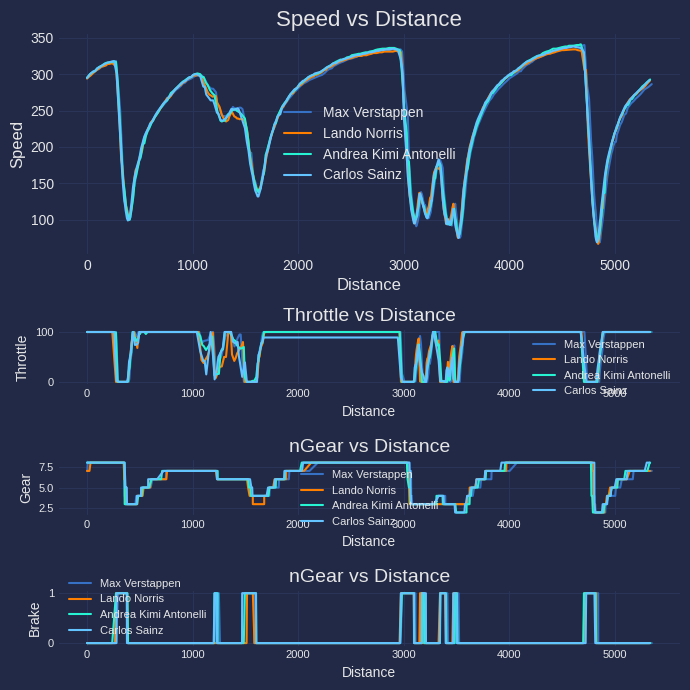

In [ ]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ant_quali.Distance, tele_ant_quali.Speed, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[0].plot(
    tele_sai_quali.Distance, tele_sai_quali.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ant_quali.Distance, tele_ant_quali.Throttle, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[1].plot(
    tele_sai_quali.Distance, tele_sai_quali.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_nor_quali.Distance, tele_nor_quali.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_ant_quali.Distance, tele_ant_quali.nGear, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[2].plot(
    tele_sai_quali.Distance, tele_sai_quali.nGear, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_nor_quali.Distance, tele_nor_quali.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_ant_quali.Distance, tele_ant_quali.Brake, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[3].plot(
    tele_sai_quali.Distance, tele_sai_quali.Brake, label="Carlos Sainz", color=get_driver_color("SAI")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [ ]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_quali_sec1),
        "Sector1Time": ant_quali_sec1,
        "Sector2Time": ant_quali_sec2,
        "Sector3Time": ant_quali_sec3,
        "Lap Time": ant_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_quali_sec1),
        "Sector1Time": sai_quali_sec1,
        "Sector2Time": sai_quali_sec2,
        "Sector3Time": sai_quali_sec3,
        "Lap Time": sai_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:28.784000,0 days 00:00:33.733000,0 days 00:00:25.056000,0 days 00:01:27.573000
2,Max Verstappen,0 days 00:00:31.813000,0 days 00:00:38.838000,0 days 00:00:32.937000,0 days 00:01:43.588000
4,Max Verstappen,0 days 00:00:28.413000,0 days 00:00:33.450000,0 days 00:00:25.007000,0 days 00:01:26.870000
5,Max Verstappen,0 days 00:00:43.043000,0 days 00:00:47.420000,0 days 00:00:33.561000,0 days 00:02:04.024000
7,Max Verstappen,0 days 00:00:28.345000,0 days 00:00:33.309000,0 days 00:00:24.989000,0 days 00:01:26.643000
8,Max Verstappen,0 days 00:00:42.740000,0 days 00:00:47.996000,0 days 00:00:33.263000,0 days 00:02:03.999000
10,Max Verstappen,0 days 00:00:28.339000,0 days 00:00:33.405000,0 days 00:00:24.910000,0 days 00:01:26.654000
11,Max Verstappen,0 days 00:00:33.433000,0 days 00:00:40.231000,0 days 00:00:34.769000,0 days 00:01:48.433000
13,Max Verstappen,0 days 00:00:28.268000,0 days 00:00:33.245000,0 days 00:00:24.979000,0 days 00:01:26.492000
14,Max Verstappen,0 days 00:00:33.102000,0 days 00:00:37.205000,0 days 00:00:32.795000,0 days 00:01:43.102000


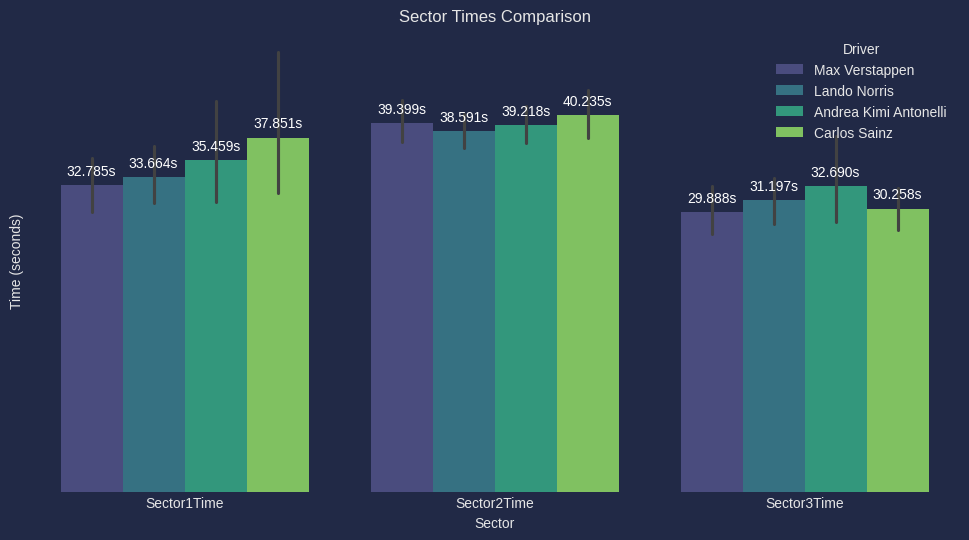

In [ ]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [36]:
race = f1.get_session(2025, "Miami", "R")
race.load()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 81 completed the race distance 00:00.036000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '23', '12', '16', '44', '55', '22', '6', '31',

In [37]:
race.session_info

{'Meeting': {'Key': 1259,
  'Name': 'Miami Grand Prix',
  'OfficialName': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2025',
  'Location': 'Miami',
  'Number': 6,
  'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'},
  'Circuit': {'Key': 151, 'ShortName': 'Miami'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10033,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 5, 4, 16, 0),
 'EndDate': datetime.datetime(2025, 5, 4, 18, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=72000),
 'Path': '2025/2025-05-04_Miami_Grand_Prix/2025-05-04_Race/'}

In [38]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,4.0,1.0,0 days 01:28:51.587000,Finished
4,NOR,McLaren,2.0,2.0,0 days 00:00:04.630000,Finished
63,RUS,Mercedes,5.0,3.0,0 days 00:00:37.644000,Finished
1,VER,Red Bull Racing,1.0,4.0,0 days 00:00:39.956000,Finished
23,ALB,Williams,7.0,5.0,0 days 00:00:48.067000,Finished
12,ANT,Mercedes,3.0,6.0,0 days 00:00:55.502000,Finished
16,LEC,Ferrari,8.0,7.0,0 days 00:00:57.036000,Finished
44,HAM,Ferrari,12.0,8.0,0 days 00:01:00.186000,Finished
55,SAI,Williams,6.0,9.0,0 days 00:01:00.577000,Finished
22,TSU,Red Bull Racing,10.0,10.0,0 days 00:01:14.434000,Finished


In [39]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:51.257000,VER,1,0 days 00:01:35.669000,1.0,NaN,NaT,NaT,NaT,0 days 00:00:34.681000,...,True,Red Bull Racing,0 days 00:57:15.384000,2025-05-04 20:03:42.225,12,2.0,False,,False,False
1,0 days 01:00:42.385000,VER,1,0 days 00:01:51.128000,2.0,NaN,NaT,NaT,0 days 00:00:31.426000,0 days 00:00:47.940000,...,True,Red Bull Racing,0 days 00:58:51.257000,2025-05-04 20:05:18.098,126,1.0,False,,False,False
2,0 days 01:02:48.331000,VER,1,0 days 00:02:05.946000,3.0,NaN,NaT,NaT,0 days 00:00:43.901000,0 days 00:00:48.777000,...,True,Red Bull Racing,0 days 01:00:42.385000,2025-05-04 20:07:09.226,671,1.0,False,,False,False
3,0 days 01:04:20.900000,VER,1,0 days 00:01:32.569000,4.0,NaN,NaT,NaT,0 days 00:00:31.185000,0 days 00:00:35.126000,...,True,Red Bull Racing,0 days 01:02:48.331000,2025-05-04 20:09:15.172,1,1.0,False,,False,True
4,0 days 01:05:53.033000,VER,1,0 days 00:01:32.133000,5.0,NaN,NaT,NaT,0 days 00:00:31.182000,0 days 00:00:34.799000,...,True,Red Bull Racing,0 days 01:04:20.900000,2025-05-04 20:10:47.741,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0 days 01:35:45.563000,BEA,87,0 days 00:01:32.680000,24.0,1.0,NaT,NaT,0 days 00:00:31.083000,0 days 00:00:35.480000,...,True,Haas F1 Team,0 days 01:34:12.883000,2025-05-04 20:40:39.724,1,12.0,False,,False,True
1001,0 days 01:37:18.617000,BEA,87,0 days 00:01:33.054000,25.0,1.0,NaT,NaT,0 days 00:00:31.073000,0 days 00:00:35.848000,...,True,Haas F1 Team,0 days 01:35:45.563000,2025-05-04 20:42:12.404,1,12.0,False,,False,True
1002,0 days 01:38:52.757000,BEA,87,0 days 00:01:34.140000,26.0,1.0,NaT,NaT,0 days 00:00:32.323000,0 days 00:00:35.617000,...,True,Haas F1 Team,0 days 01:37:18.617000,2025-05-04 20:43:45.458,1,12.0,False,,False,True
1003,0 days 01:40:26.361000,BEA,87,0 days 00:01:33.604000,27.0,1.0,NaT,NaT,0 days 00:00:31.130000,0 days 00:00:35.590000,...,True,Haas F1 Team,0 days 01:38:52.757000,2025-05-04 20:45:19.598,1,13.0,False,,False,True


In [40]:
pia_race_laps = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race_laps.pick_fastest().LapTime
pia_race_lap_time = pia_race_laps["LapTime"]
pia_race_sec1 = pia_race_laps["Sector1Time"]
pia_race_sec2 = pia_race_laps["Sector2Time"]
pia_race_sec3 = pia_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_race), "which was in Lap number" ,pia_race_laps.pick_fastest().LapNumber)
pia_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:29.822000 which was in Lap number 35.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
920,0 days 00:01:37.135000,NaT,0 days 00:00:35.461000,0 days 00:00:26.010000,211.0,185.0,279.0,312.0
921,0 days 00:01:52.677000,0 days 00:00:32.129000,0 days 00:00:48.571000,0 days 00:00:31.977000,209.0,148.0,218.0,197.0
922,0 days 00:02:04.620000,0 days 00:00:43.533000,0 days 00:00:50.031000,0 days 00:00:31.056000,130.0,156.0,279.0,176.0
923,0 days 00:01:31.920000,0 days 00:00:31.339000,0 days 00:00:34.520000,0 days 00:00:26.061000,212.0,185.0,277.0,306.0
924,0 days 00:01:32.282000,0 days 00:00:31.194000,0 days 00:00:35.139000,0 days 00:00:25.949000,210.0,185.0,278.0,310.0


In [41]:
fastest_lap_pia_race = pia_race_laps.pick_fastest()
tele_pia_race = fastest_lap_pia_race.get_telemetry().add_distance()
speed_pia_race = tele_pia_race.Speed
tele_pia_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,287.520003,7,11470.040069
3,289.000000,7,11510.000000
4,289.350003,7,11522.775117
5,291.000000,7,11583.000000
6,291.800000,7,11617.400000
...,...,...,...
680,281.000000,7,11215.000000
681,285.000000,7,11346.000000
682,285.000000,7,11347.181218
683,285.000000,7,11373.000000


In [42]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.318000 which was in Lap number 31.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
862,0 days 00:01:38.178000,NaT,0 days 00:00:35.704000,0 days 00:00:26.329000,207.0,184.0,276.0,312.0
863,0 days 00:01:52.831000,0 days 00:00:31.940000,0 days 00:00:48.138000,0 days 00:00:32.753000,204.0,157.0,218.0,154.0
864,0 days 00:02:04.090000,0 days 00:00:43.671000,0 days 00:00:49.087000,0 days 00:00:31.332000,150.0,173.0,278.0,218.0
865,0 days 00:01:32.646000,0 days 00:00:31.480000,0 days 00:00:35.224000,0 days 00:00:25.942000,208.0,184.0,282.0,328.0
866,0 days 00:01:32.779000,0 days 00:00:31.580000,0 days 00:00:35.190000,0 days 00:00:26.009000,206.0,186.0,281.0,321.0


In [43]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,284.312499,7,11699.624986
3,285.612499,7,11723.024986
4,286.000000,7,11730.000000
5,286.362502,7,11619.195100
6,289.000000,7,10813.000000
...,...,...,...
660,278.517501,7,11468.977567
661,279.867500,7,11531.527478
662,281.000000,7,11584.000000
663,281.708333,7,11609.358333


In [44]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.466000 which was in Lap number 41.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:35.669000,NaT,0 days 00:00:34.681000,0 days 00:00:26.310000,213.0,184.0,272.0,302.0
1,0 days 00:01:51.128000,0 days 00:00:31.426000,0 days 00:00:47.940000,0 days 00:00:31.762000,208.0,130.0,216.0,257.0
2,0 days 00:02:05.946000,0 days 00:00:43.901000,0 days 00:00:48.777000,0 days 00:00:33.268000,143.0,178.0,263.0,195.0
3,0 days 00:01:32.569000,0 days 00:00:31.185000,0 days 00:00:35.126000,0 days 00:00:26.258000,204.0,183.0,274.0,303.0
4,0 days 00:01:32.133000,0 days 00:00:31.182000,0 days 00:00:34.799000,0 days 00:00:26.152000,206.0,184.0,274.0,304.0


In [45]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,285.390001,7,11321.090020
3,286.259999,7,11348.059960
4,287.000000,7,11371.000000
5,287.912501,7,11405.675030
6,288.000000,7,11409.000000
...,...,...,...
680,282.000000,7,11202.000000
681,283.181249,7,11248.068703
682,284.306249,7,11291.943703
683,285.000000,7,11319.000000


In [46]:
alb_race_laps = race.laps.pick_driver("ALB")
fastest_lap_alb_race = alb_race_laps.pick_fastest().LapTime
alb_race_lap_time = alb_race_laps["LapTime"]
alb_race_sec1 = alb_race_laps["Sector1Time"]
alb_race_sec2 = alb_race_laps["Sector2Time"]
alb_race_sec3 = alb_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_alb_race), "which was in Lap number" ,alb_race_laps.pick_fastest().LapNumber)
alb_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.482000 which was in Lap number 55.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
397,0 days 00:01:38.782000,NaT,0 days 00:00:35.605000,0 days 00:00:26.293000,210.0,183.0,277.0,311.0
398,0 days 00:01:53.640000,0 days 00:00:32.216000,0 days 00:00:48.993000,0 days 00:00:32.431000,NaN,158.0,222.0,159.0
399,0 days 00:02:03.540000,0 days 00:00:43.407000,0 days 00:00:49.929000,0 days 00:00:30.204000,146.0,174.0,282.0,227.0
400,0 days 00:01:33.079000,0 days 00:00:31.543000,0 days 00:00:35.543000,0 days 00:00:25.993000,211.0,183.0,282.0,313.0
401,0 days 00:01:33.836000,0 days 00:00:32.120000,0 days 00:00:35.883000,0 days 00:00:25.833000,200.0,181.0,283.0,321.0


In [47]:
fastest_lap_alb_race = alb_race_laps.pick_fastest()
tele_alb_race = fastest_lap_alb_race.get_telemetry().add_distance()
speed_alb_race = tele_alb_race.Speed
tele_alb_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,288.774999,7,10391.749973
3,289.074999,7,10406.749973
4,290.000000,8,10453.000000
5,292.418749,8,10453.000000
6,293.000000,8,10453.000000
...,...,...,...
679,282.940000,7,11616.320000
680,283.000000,7,11618.000000
681,287.625001,7,10286.924791
682,288.000000,8,10179.000000


In [48]:
ant_race_laps = race.laps.pick_driver("ANT")
fastest_lap_ant_race = ant_race_laps.pick_fastest().LapTime
ant_race_lap_time = ant_race_laps["LapTime"]
ant_race_sec1 = ant_race_laps["Sector1Time"]
ant_race_sec2 = ant_race_laps["Sector2Time"]
ant_race_sec3 = ant_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ant_race), "which was in Lap number" ,ant_race_laps.pick_fastest().LapNumber)
ant_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.795000 which was in Lap number 27.0


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
114,0 days 00:01:36.850000,NaT,0 days 00:00:35.389000,0 days 00:00:26.219000,207.0,183.0,276.0,313.0
115,0 days 00:01:52.276000,0 days 00:00:31.837000,0 days 00:00:47.990000,0 days 00:00:32.449000,209.0,130.0,212.0,246.0
116,0 days 00:02:04.905000,0 days 00:00:43.447000,0 days 00:00:49.061000,0 days 00:00:32.397000,139.0,164.0,272.0,192.0
117,0 days 00:01:33.016000,0 days 00:00:31.385000,0 days 00:00:35.730000,0 days 00:00:25.901000,209.0,181.0,281.0,324.0
118,0 days 00:01:32.859000,0 days 00:00:31.587000,0 days 00:00:35.216000,0 days 00:00:26.056000,208.0,184.0,277.0,317.0


In [49]:
fastest_lap_ant_race = ant_race_laps.pick_fastest()
tele_ant_race = fastest_lap_ant_race.get_telemetry().add_distance()
speed_ant_race = tele_ant_race.Speed
tele_ant_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,283.762499,7,11716.549965
3,284.000000,7,11727.000000
4,286.437498,7,11763.562464
5,287.000000,7,11772.000000
6,287.031250,7,11727.906814
...,...,...,...
685,282.055556,7,11579.444476
686,283.000000,7,11621.000000
687,286.000000,7,11759.000000
688,286.187501,7,11766.687533


In [50]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Alexander Albon"] * len(alb_race_sec1),
        "Sector1Time": alb_race_sec1,
        "Sector2Time": alb_race_sec2,
        "Sector3Time": alb_race_sec3,
        "Lap Time": alb_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_race_sec1),
        "Sector1Time": ant_race_sec1,
        "Sector2Time": ant_race_sec2,
        "Sector3Time": ant_race_sec3,
        "Lap Time": ant_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:32.129000,0 days 00:00:48.571000,0 days 00:00:31.977000,0 days 00:01:52.677000
2,Oscar Piastri,0 days 00:00:43.533000,0 days 00:00:50.031000,0 days 00:00:31.056000,0 days 00:02:04.620000
3,Oscar Piastri,0 days 00:00:31.339000,0 days 00:00:34.520000,0 days 00:00:26.061000,0 days 00:01:31.920000
4,Oscar Piastri,0 days 00:00:31.194000,0 days 00:00:35.139000,0 days 00:00:25.949000,0 days 00:01:32.282000
5,Oscar Piastri,0 days 00:00:31.005000,0 days 00:00:35.063000,0 days 00:00:25.979000,0 days 00:01:32.047000
...,...,...,...,...,...
280,Andrea Kimi Antonelli,0 days 00:00:30.307000,0 days 00:00:34.885000,0 days 00:00:25.796000,0 days 00:01:30.988000
281,Andrea Kimi Antonelli,0 days 00:00:30.244000,0 days 00:00:34.894000,0 days 00:00:25.774000,0 days 00:01:30.912000
282,Andrea Kimi Antonelli,0 days 00:00:30.274000,0 days 00:00:34.846000,0 days 00:00:25.709000,0 days 00:01:30.829000
283,Andrea Kimi Antonelli,0 days 00:00:30.270000,0 days 00:00:34.893000,0 days 00:00:25.774000,0 days 00:01:30.937000


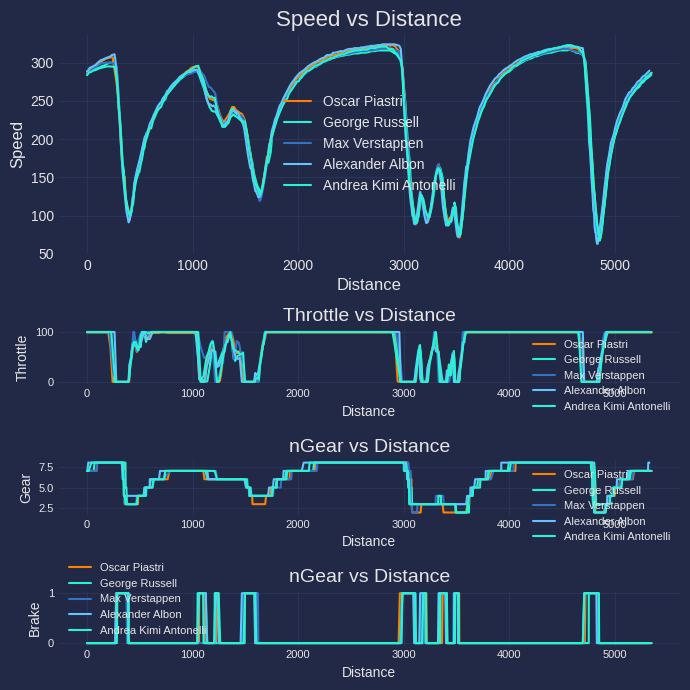

In [51]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_race.Distance, tele_pia_race.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_alb_race.Distance, tele_alb_race.Speed, label="Alexander Albon", color=get_driver_color("ALB")
)
ax[0].plot(
    tele_ant_race.Distance, tele_ant_race.Speed, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_race.Distance, tele_pia_race.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_alb_race.Distance, tele_alb_race.Throttle, label="Alexander Albon", color=get_driver_color("ALB")
)
ax[1].plot(
    tele_ant_race.Distance, tele_ant_race.Throttle, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_race.Distance, tele_pia_race.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_race.Distance, tele_rus_race.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_alb_race.Distance, tele_alb_race.nGear, label="Alexander Albon", color=get_driver_color("ALB")
)
ax[2].plot(
    tele_ant_race.Distance, tele_ant_race.nGear, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_race.Distance, tele_pia_race.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_race.Distance, tele_rus_race.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_alb_race.Distance, tele_alb_race.Brake, label="Alexander Albon", color=get_driver_color("ALB")
)
ax[3].plot(
    tele_ant_race.Distance, tele_ant_race.Brake, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [52]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Alexander Albon"] * len(alb_race_sec1),
        "Sector1Time": alb_race_sec1,
        "Sector2Time": alb_race_sec2,
        "Sector3Time": alb_race_sec3,
        "Lap Time": alb_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_race_sec1),
        "Sector1Time": ant_race_sec1,
        "Sector2Time": ant_race_sec2,
        "Sector3Time": ant_race_sec3,
        "Lap Time": ant_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:32.129000,0 days 00:00:48.571000,0 days 00:00:31.977000,0 days 00:01:52.677000
2,Oscar Piastri,0 days 00:00:43.533000,0 days 00:00:50.031000,0 days 00:00:31.056000,0 days 00:02:04.620000
3,Oscar Piastri,0 days 00:00:31.339000,0 days 00:00:34.520000,0 days 00:00:26.061000,0 days 00:01:31.920000
4,Oscar Piastri,0 days 00:00:31.194000,0 days 00:00:35.139000,0 days 00:00:25.949000,0 days 00:01:32.282000
5,Oscar Piastri,0 days 00:00:31.005000,0 days 00:00:35.063000,0 days 00:00:25.979000,0 days 00:01:32.047000
...,...,...,...,...,...
280,Andrea Kimi Antonelli,0 days 00:00:30.307000,0 days 00:00:34.885000,0 days 00:00:25.796000,0 days 00:01:30.988000
281,Andrea Kimi Antonelli,0 days 00:00:30.244000,0 days 00:00:34.894000,0 days 00:00:25.774000,0 days 00:01:30.912000
282,Andrea Kimi Antonelli,0 days 00:00:30.274000,0 days 00:00:34.846000,0 days 00:00:25.709000,0 days 00:01:30.829000
283,Andrea Kimi Antonelli,0 days 00:00:30.270000,0 days 00:00:34.893000,0 days 00:00:25.774000,0 days 00:01:30.937000


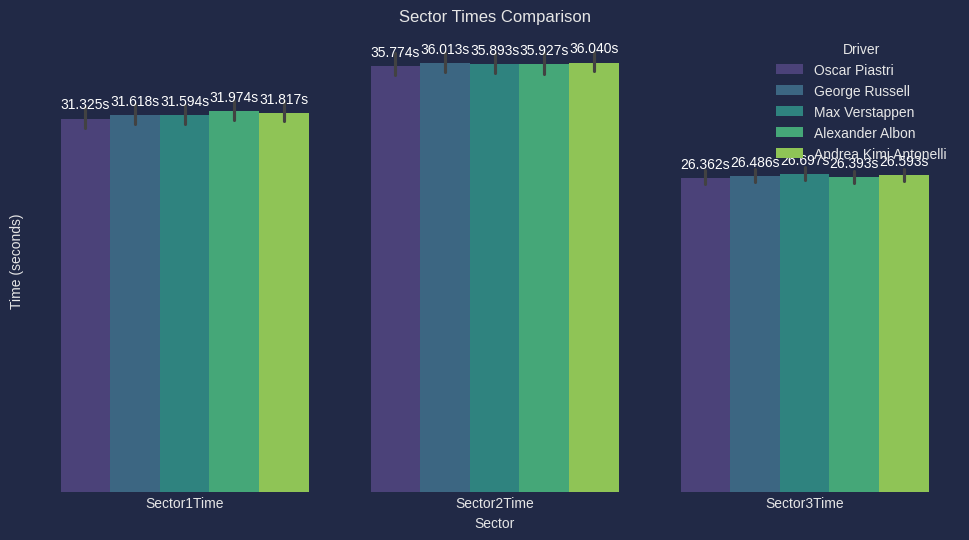

In [53]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

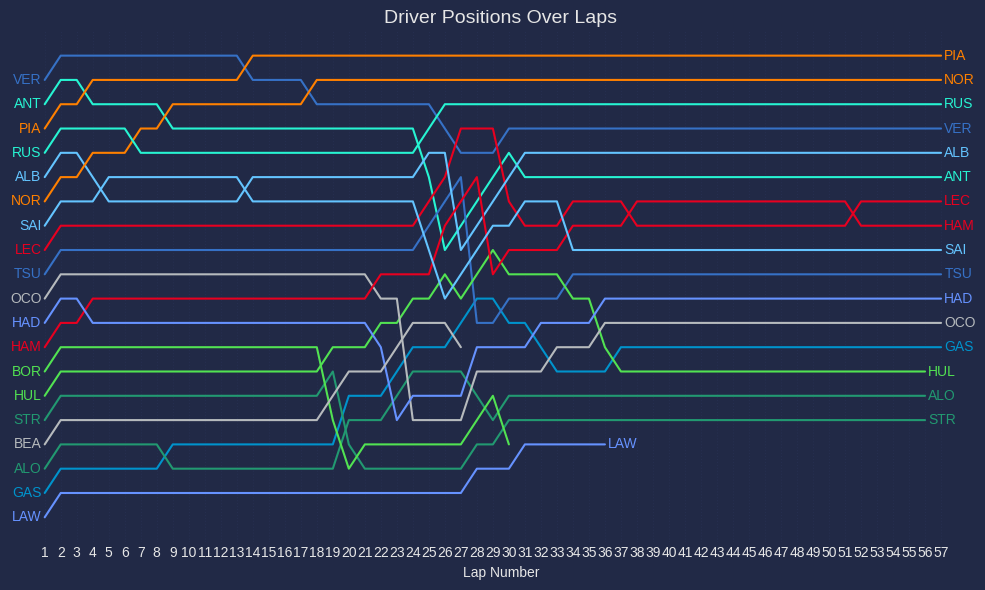

In [54]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

In [ ]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [56]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_29622/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
16,LAW,311.0
9,TSU,316.0
17,BOR,320.0
13,HUL,320.0
1,NOR,324.0
5,ANT,324.0
10,HAD,326.0
2,RUS,328.0
3,VER,332.0
6,LEC,333.0


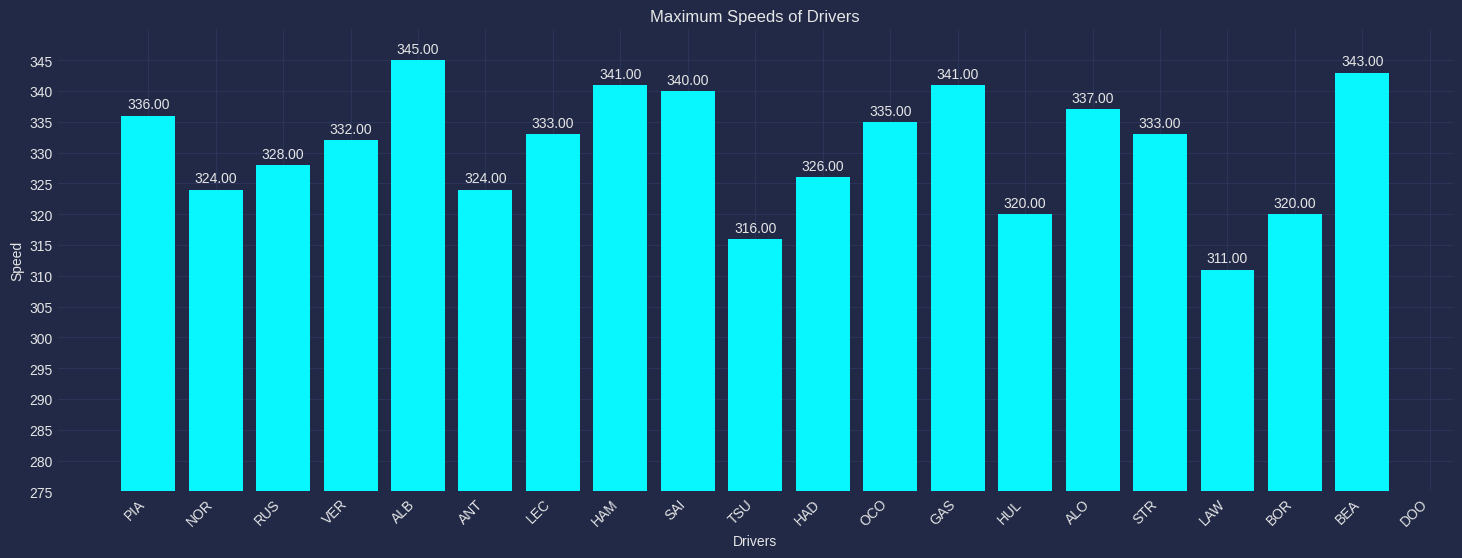

In [57]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [59]:
plotting.setup_mpl()

In [60]:
laps_ver = race_laps.pick_driver("VER")
laps_pia = race_laps.pick_driver("PIA")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_pia = laps_pia.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_pia["Driver"] = "PIA"
telemetry = pd.concat([fastest_ver,fastest_pia])

/home/hexa/Coding/random/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [61]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [62]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,PIA,297.511920
1,1,VER,294.381418
2,2,PIA,170.505927
3,2,VER,160.837865
4,3,PIA,175.481741
5,3,VER,181.545608
6,4,PIA,252.957687
7,4,VER,252.972448
8,5,PIA,288.391254
9,5,VER,284.022171


In [65]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [66]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'PIA', 'Fastest_driver_int'] = 2

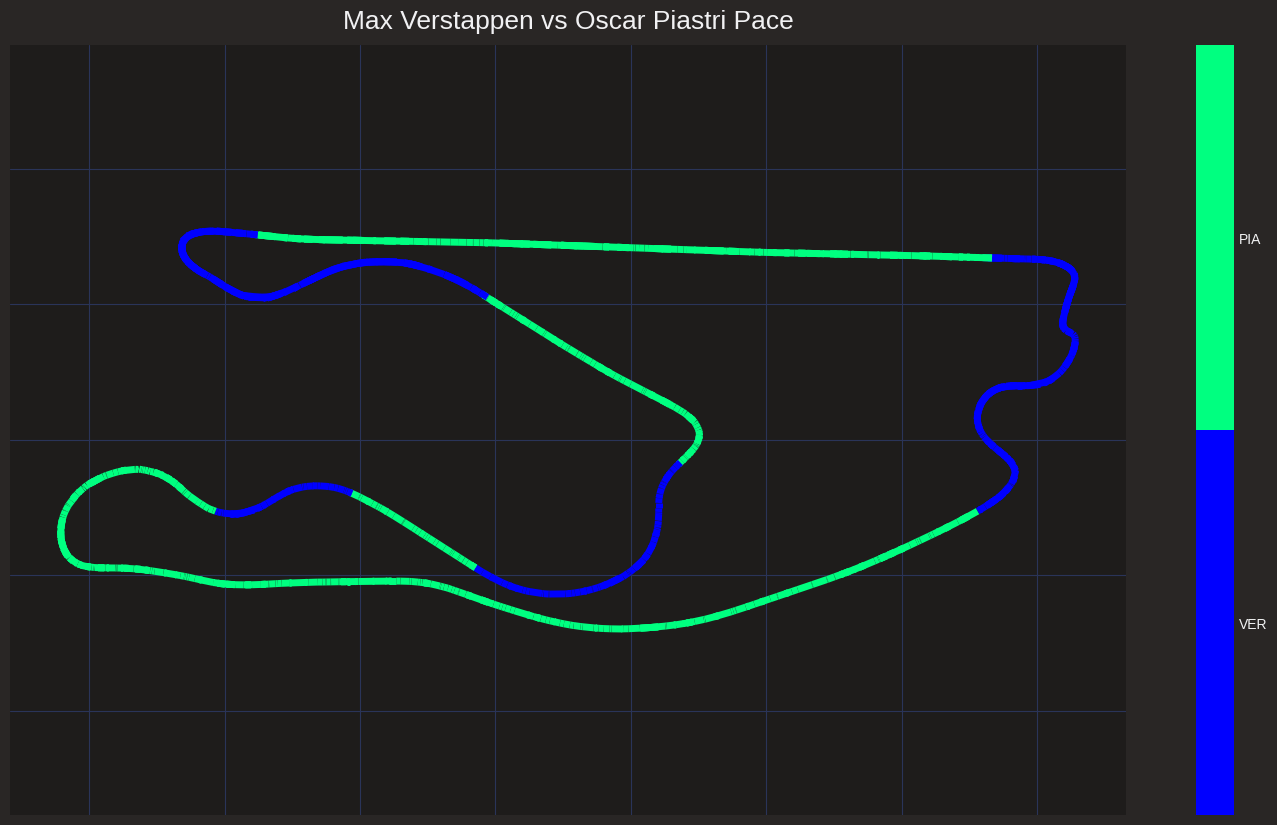

In [67]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'PIA'])
plt.title("Max Verstappen vs Oscar Piastri Pace")
plt.show()
